# Linear Regression

**Target Variable (Label)**
- median_house_value
.
**Input Features (Examples)**
- housing_median_age
- total_rooms
- total_bedrooms
- population
- households
- median_income etc.

# Simple Linear Regression

i.e., One input variable/feature and one output variable/target

So, Our model: $$ y = wX+b$$

Where, 
- X : input to the model
- y : output of the model for the given input X
- w,b : parameters for best fit and are referred as $\theta$ for ease of use. 


Here, 
- x-axis: housing_median_age
- y-axis: median_house_value


**Definition**:

- `Linear regression` is a simple approach to supervised learning. It assumes that the dependence of 𝑌 on 𝑥1, 𝑥2,…,$𝑥_𝑛$ is linear. 

- `Linear regression` is a fundamental statistical and machine learning technique used to model the relationship between a dependent (target) variable and one or more independent (predictor) variables. The goal is to **fit a linear model to the data that best predicts the target variable**.

$$Data Retrieval and Collection$$

In [1]:
import pandas as pd

data = pd.read_csv("./housing.csv")
age = data['housing_median_age'].values
value = data['median_house_value'].values

Display basic information (shape, column names)

In [2]:
print(f'housing_median_age shape: {age.shape}, median_house_value shape: {value.shape}')

housing_median_age shape: (20640,), median_house_value shape: (20640,)


$$Data Cleaning$$

In [3]:
pd.Series(age).describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
dtype: float64

In [4]:
pd.Series(value).describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
dtype: float64

Here, the scale of the two series is different, so converting it to the same scale.

And Data has no missing values.

In [5]:
value = value /10000

pd.Series(value).describe()

count    20640.000000
mean        20.685582
std         11.539562
min          1.499900
25%         11.960000
50%         17.970000
75%         26.472500
max         50.000100
dtype: float64

Let's visualize the data: 

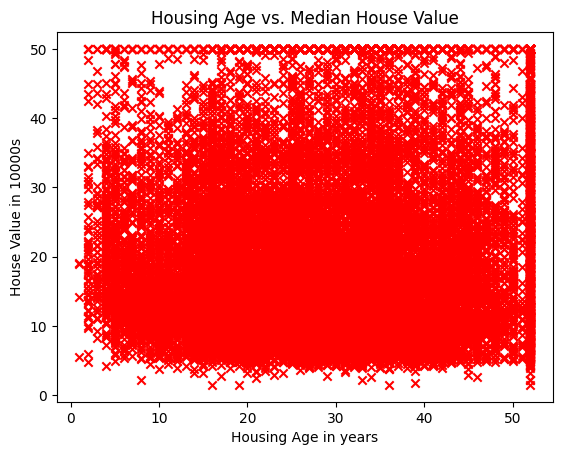

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(age,value, marker='x', color='red')
plt.xlabel('Housing Age in years')
plt.ylabel('House Value in 10000s')

plt.title('Housing Age vs. Median House Value')
plt.show()

<!-- ### 2. Feature Design -->

Here, we have two columns, if we consider one as input/feature and the other as the output/labels then we do not require `Feature Designing.`

<!-- ### 3. Algorithm Selection -->

Here, the target is a numeric and not class/category, therefore it is a regression task. A simple regression task i.e. `regression task that take one variable as input and predicts another`. 

We use Linear Regression here because we are trying to see if the House Price follows a similar "pattern" based on its Age. It’s the best "ruler" to measure if there is a straight-line connection between those two numbers.

## Linear Regression


Mathematically, 

`Model`:
- model` with single independent variable and single dependent variable : $f_{w,b}(x)=wx+b$

Where,
- x is the independent variable and
- w, b are the parameters to fit/set. (slope and intercept for this case)

![Slope-Intercept](https://s3-us-west-2.amazonaws.com/courses-images-archive-read-only/wp-content/uploads/sites/924/2015/11/25201048/CNX_Precalc_Figure_02_02_0032.jpg)

`Parameters`: $w,b$ 
- This it the variable that we can adjust to improve the model. 
- also called coefficients/weights



Here, 

- $(x^{(i)},y^{(i)})$ is a data point in our dataset, and 
- predicted value for independent variable value $x^{(i)}$ is $\hat{y}^{(i)}$

Our goal in Linear Regression is to **find $w,b$ such that $\hat{y}^{(i)}$ is close to $y^{(i)}$ for all $(x^{(i)},y^{(i)})$**

So how do we do that? 

To do that, let's first understand the cost function: 

Prediction error = $(\hat{y}-y)$

Prediction error for ith value: $(\hat{y}^{(i)}-y^{(i)})$

Here, depending on the which side of the regression line is the label value, the value of prediction error can be positive or negative. Therefore, let's square them. 

Square of Prediction error for ith value: $(\hat{y}^{(i)}-y^{(i)})^2$

Assuming we have $m$ number of input data/values then sum of squared prediction error will be: $\sum^{m}_{i=1}(\hat{y}^{(i)}-y^{(i)})^2$

Then mean will be, $\frac{1}{m} \sum^{m}_{i=1}(\hat{y}^{(i)}-y^{(i)})^2$
+
But in ML, researchers often divide by $2m$ instead of the $m$. 

Why is it the case? Please include the answer to this question by the last lab.

So cost function is: 

$$ J(w,b) = \frac{1}{2m} \sum^{m}_{i=1}(\hat{y}^{(i)}-y^{(i)})^2$$

Also, 

$$ J(w,b) = \frac{1}{2m} \sum^{m}_{i=1}(f_{w,b}((x)^{(i)})-y^{(i)})^2$$


Now, you have the `Squared Error Cost Function`. Also called  [Mean Squared Error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error).

![MSE](https://cdn-media-1.freecodecamp.org/images/MNskFmGPKuQfMLdmpkT-X7-8w2cJXulP3683)

The objective of the learning algorithm, then, is to find the parameters $w,b$ which give the minimum possible cost `J`.

Again, our goal in Linear Regression is to 
- find $w,b$ such that $\hat{y}^{(i)}$ is close to $y^{(i)}$ for all $(x^{(i)},y^{(i)})$

Mathematically it is written as: 
$$ \underset{w,b}{\text{minimize}} \quad J(w,b)$$

Or if we refer $w$ and $b$ as $\theta$ then it can be written as: 
$$ \underset{\theta}{\text{minimize}} \quad J(\theta)$$




The term `loss function` and `cost function` are used interchangeably , however there is a difference. The loss function measures the error for a single data point, while the cost function is the average of the loss function over the entire dataset. The cost function is typically what is minimized during model training.

In [7]:
# let's code the cost function. 

import numpy as np

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

Before computing the cost with an initial guess for $w$ and $b$, a column of 1s is prepended onto the input data. This allows us to vectorize the cost function, as well as make it usable for multiple linear regression later. This first value 
$b$ now behaves as a constant in the cost function.

In [8]:
theta = np.zeros(2)
X = np.column_stack((np.ones(len(age)), age))
y = value
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

theta: [0. 0.]
cost: 280.5241599493627


<!-- ### 5. Model Learning -->

**Gradient descent** is the backbone of the learning process for various algorithms, including linear regression, logistic regression, support vector machines, and neural networks which serves as a fundamental optimization technique to minimize the cost function of a model by **iteratively adjusting the model parameters to reduce the difference between predicted and actual values, improving the model's performance.**

**Gradient Descent Algorithm for Linear Regression**

Given:
- Training set: $(x^{(i)}, y^{(i)})$ for $i = 1, \dots, m$
- Hypothesis: 
$$
f_{w,b}(x) = wx + b
$$
- Cost function: 
$$
J(w,b) = \frac{1}{2m} \sum_{i=1}^m (wx^{(i)} + b - y^{(i)})^2
$$
- Learning rate: $\alpha$


 **Algorithm for single variable Linear Regression**

1. **Initialize parameters**
   - $w := 0, \quad b := 0$

2. **Repeat until convergence** (or for a fixed number of iterations):

   a. **Compute gradients**
      - $\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^m (wx^{(i)} + b - y^{(i)}) x^{(i)}$
      - $\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (wx^{(i)} + b - y^{(i)}) $

   b. **Update parameters**
      - $w := w - \alpha \frac{\partial J}{\partial w}$
      - $ b := b - \alpha \frac{\partial J}{\partial b} $

3. **Return optimized parameters**
   - $ w, b $


In [9]:
# let's code gradient descent update rule for single variable linear regression
def gradient_descent(X, y, alpha, iterations):
    theta = np.zeros(2)
    m = len(y)
    
    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])

    return theta

In [10]:
# Feature scaling
X[:, 1] = (X[:, 1] - np.mean(X[:, 1])) / np.std(X[:, 1])

alpha = 0.01
iterations = 2000

theta = gradient_descent(X, y, alpha, iterations)
cost = compute_cost(X, y, theta)

print("theta:", theta)
print("cost:", cost)


theta: [20.68558165  1.21881834]
cost: 65.83475592280574


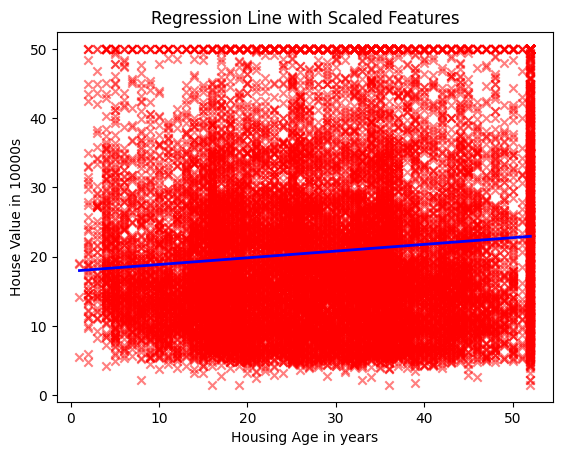

In [11]:
plt.scatter(age, value, marker='x', color='red', alpha=0.5)
plt.xlabel('Housing Age in years')
plt.ylabel('House Value in 10000s')

# 1. Create the range of age values
samples = np.linspace(min(age), max(age))

# 2. Scale the samples so they match the "theta" training
# We use the same formula: (x - mean) / std
samples_scaled = (samples - np.mean(age)) / np.std(age)

# 3. Plot the line using scaled samples
plt.plot(samples, theta[0] + theta[1] * samples_scaled, color='blue', linewidth=2)
plt.title('Regression Line with Scaled Features')
plt.show()

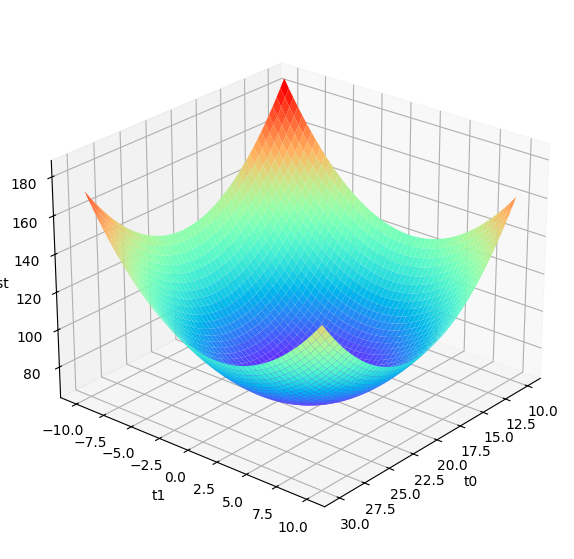

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

Xs, Ys = np.meshgrid(
    np.linspace(10, 30, 50),
    np.linspace(-10, 10, 50)
)

Zs = np.array([
    compute_cost(X, y, [t0, t1])
    for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))
])
Zs = Zs.reshape(Xs.shape)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel(r't0')
ax.set_ylabel(r't1')
ax.set_zlabel(r'cost')
ax.view_init(elev=25, azim=40)

ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)
plt.show()

Finally, a countour plot reveals slices of that surface plot in 2D space, and can show the resulting $\theta$={w,b}  values sitting exactly at the global minimum.

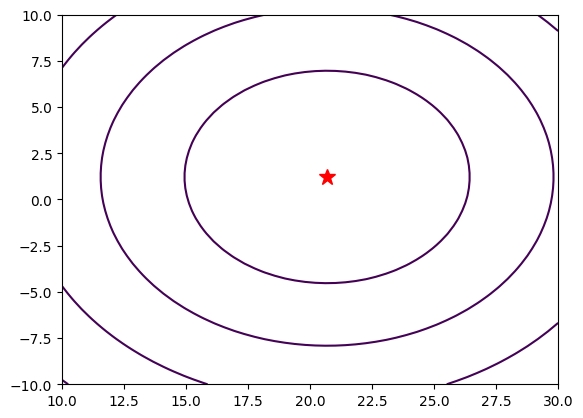

In [13]:
ax = plt.figure().gca()
plt.contour(Xs, Ys, Zs, np.logspace(1.8, 4, 20)) 
ax.plot(theta[0], theta[1], 'r*', markersize=12, label='Optimal Point')

What does the Coefficient represent? It represents the rate of change.

What does the Intercept mean? It represents the starting price.

# Multi Variable Linear Regresssion

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load dataset
df = pd.read_csv("./housing.csv")
df = df.dropna()

# Separate features and target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"].values
y = y / 100000

# Identify categorical and numeric columns
categorical = ["ocean_proximity"]
numeric = X.drop(categorical, axis=1).columns

# Encode categorical column
encoder = OneHotEncoder(sparse_output=False,  handle_unknown="ignore")
encoded_cat = encoder.fit_transform(X[categorical])

# Convert numeric values to array
numeric_data = X[numeric].values

# Combine encoded categorical + numeric data
X = np.hstack([numeric_data, encoded_cat])

# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias / intercept term manually
X = np.column_stack((np.ones(X.shape[0]), X))


The next step is to implement gradient descent for any number of features. Fortunately, the update step generalizes easily, and can be vectorized to avoid iterating through $\theta_j$ 
 values as might be suggested by the single variable implementation above:

In [33]:

# Initialize theta
theta = np.zeros(X.shape[1])

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    return (1/(2*m)) * np.sum((predictions - y)**2)

# Gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for i in range(iterations):
        gradient = (1/m) * (X.T @ (X @ theta - y))
        theta = theta - alpha * gradient
    return theta

# Hyperparameters
alpha = 0.001          # LOWERED LEARNING RATE
iterations = 20000

# Train model
theta = gradient_descent(X, y, theta, alpha, iterations)

# Compute final cost
cost = compute_cost(X, y, theta)

print("theta:", theta)
print("cost:", cost)


theta: [ 2.06864413 -0.25250241 -0.24592553  0.1424938  -0.0311938   0.2669318
 -0.40338881  0.22365467  0.72915748  0.08579095 -0.19096073  0.02858513
  0.05202705  0.08818002]
cost: 0.23857567426347578


Unfortunately, it's now more difficult to evaluate the results visually, but we can check them a totally different method of calculating the answer, the normal equation. 

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

# Load California Housing dataset
df = pd.read_csv("housing.csv")

# Remove rows with missing values
df = df.dropna()

# Separate target
y = df["median_house_value"].values / 100000   # scale target

# Separate features
X = df.drop("median_house_value", axis=1)

# One-hot encode categorical column
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_cat = encoder.fit_transform(X[['ocean_proximity']])

# Numeric features
X_num = X.drop(columns=['ocean_proximity']).values

# Combine numeric + encoded categorical
X_final = np.hstack([X_num, X_cat])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# Train model
model = LinearRegression()
model.fit(X_scaled, y)

# Output
print("Bias (Intercept):", model.intercept_)
print("Weights (Coefficients):", model.coef_)


Bias (Intercept): 2.0686441315511113
Weights (Coefficients): [-0.53720598 -0.54437474  0.13504633 -0.1353362   0.42371883 -0.43025834
  0.18968201  0.74563539  0.0617865  -0.1250008   0.02586135  0.02666992
  0.05597101]


What does each coefficient represent? It is the direction and strength of a feature's influence.

How does this differ from the single-feature model?

- Context: Instead of guessing price based only on "Age," the model now looks at the "Full Picture" (income, size, and location).

- Fairness: The "Age" coefficient is more accurate here because the model isn't forcing age to explain things that are actually caused by income or location.

- Precision: By using multiple clues, it makes much smaller mistakes and understands reality far better.

1. Which model performs better?

- Task 2 (Multi-variable) is the clear winner because it uses more "clues" to make a much more accurate prediction.

2. Why does using multiple features help?

- Better Context: Real-world house prices depend on many things (like income and location), not just age.

- Reduced Error: Multiple features help it understand the "Why" behind price differences that a single feature would miss.

3. Which model is easier to interpret?

- Task 1 (Single-feature) is much easier to explain because you only have to look at the relationship between one cause and one effect.

Feature,Task 1 (Simple),Task 2 (Multiple)

Accuracy,🔴 Low,🟢 High

Clarity,🟢 Very Easy,🟡 Moderate

Real-world Use,🔴 Poor,🟢 Good